In [1]:
import timeit
from keras.models import Model,Sequential
from keras.layers import Input, Embedding, LSTM, Dense,concatenate,  Dropout, Flatten
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop, adam
from keras.optimizers import SGD
from keras.datasets import mnist
import tensorflow as tf

import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
############################################################################
numpy.random.seed(7)

C:\Users\Ali_saeid\Anaconda_3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plot_(history):
    training_loss1 = history.history['loss']
    test_loss1 = history.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();
###############################################################################

In [3]:

batch_size = 128
num_classes = 10
epochs = 4

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

number_train=60000
number_test=10000

x_train=x_train[0:number_train,:]
x_test=x_test[0:number_test,:]

y_train=y_train[0:number_train]
y_test=y_test[0:number_test]

60000 train samples
10000 test samples


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 41s 685us/step - loss: 0.2082 - acc: 0.9366 - val_loss: 0.1074 - val_acc: 0.9660
Epoch 2/4
60000/60000 [==============================] - 41s 678us/step - loss: 0.0771 - acc: 0.9764 - val_loss: 0.1954 - val_acc: 0.9450
Epoch 3/4
60000/60000 [==============================] - 41s 682us/ste

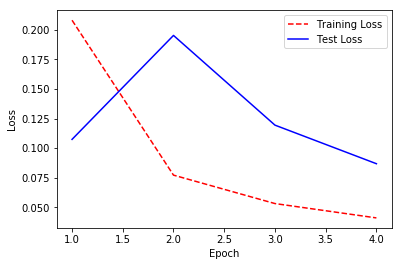

In [5]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
start = timeit.default_timer()
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = timeit.default_timer()
print(end-start)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_(history)
